sigma bacchetta
1.940257747824224e-07


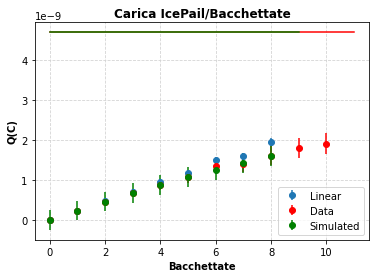

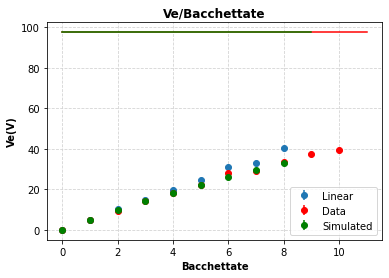

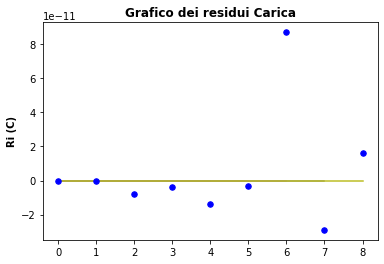

sigma_post_fit
3.3399289548164584e-11
Qerr
[0.00000000e+00 3.21898005e-11 6.62664310e-11 9.18660613e-11
 1.15339593e-10 1.40488266e-10 2.01181939e-10 2.07684340e-10
 2.31617678e-10 2.52683267e-10 2.65812036e-10]


In [1]:
#sfera attaccata al generatore, si carica la bacchetta sulla sfera, si scarica sull'ice pail e si misura V
#prima con una bacchettata -> misura, poi altra bacchettata -> misura ecc
#per verificare che a x bacchettate si ha una carica x volte piu grande
#confrontando un valore simulato dalla prima bacchettata dovrebbe crescere non come un multiplo
#ma con qualcoa in meno arrivando ad un valore di saturazione, quando densità bacchetta = densità ice pail

import numpy as np
import matplotlib.pyplot as plt

D2 = 0.15
D1 = 0.1
D2err = 0.01
D1err = 0.0001
L = 0.15
Lerr = 0.0001
eps = 8.859E-12

Cg = 2*np.pi*eps*L/np.log(D2/D1)
epsL = Lerr/L
errlnD2 = D2err/D2
epslnD2 = errlnD2/np.abs(np.log(D2))
errlnD1 = D1err/D1
epslnD1 = errlnD1/np.abs(np.log(D1))
Cgerr = Cg*(epsL+epslnD1+epslnD2)

Ce = 2.74424417e-11
Ce_err = 2.06085147e-12

Sicepail = np.pi*D1/2*L
Sicepailerr = Sicepail*(Lerr/L+D1err/D1)

DBacchetta = 0.04
DBerr = 0.0001
SBacchetta = np.pi/4*DBacchetta**2
SBacchettaerr = SBacchetta*2*DBerr/DBacchetta

Vdata = np.array([0,4.94334415,9.63639239,14.09181794,18.32165232,22.33731787,26.14965859,29.76896939,33.20502395,36.46710107,39.56400972])
Vdataerr = np.ones(len(Vdata))
for i in range(len(Vdata)):
	if(Vdata[i]<25):
		Vdataerr[i] = 0.3
		if(Vdata[i]<8):
			Vdataerr[i] = 0.1
		if(Vdata[i]<2.5):
			Vdataerr[i] = 0.03

Vdata = np.concatenate((Vdata[:2],Vdata[2:]-np.random.normal(0, Vdataerr[2:], len(Vdata)-2)))
#Vdata = np.array([0,])
#Vdataerr = np.array([0,])
Qdata = Vdata*(Cg+Ce)
Qdataerr = np.concatenate(([0],Qdata[1:]*((Vdataerr[1:]/Vdata[1:])**2+((Cgerr**2+Ce_err**2)**(1/2)/(Cg+Ce))**2)**(1/3)))


Ve = np.arange(0,max(Vdata),Vdata[1]-Vdata[0])
Ve_err = np.ones(len(Ve))
for i in range(len(Ve_err)):
	if(Ve[i]<25):
		Ve_err[i] = 0.3
		if(Ve[i]<8):
			Ve_err[i] = 0.1
		if(Ve[i]<2.5):
			Ve_err[i] = 0.03
Ve = Ve-np.random.normal(0, Ve_err, len(Ve))
Q = (Ce+Cg)*Ve
Qerr = Q*(((Cgerr**2+Ce_err**2)**(1/2)/(Cg+Ce))**2+(Ve_err/Ve)**2)**(1/2)
QBacchetta = Q[1]*(1+SBacchetta/Sicepail)
QBacchettaerr = QBacchetta*(Qerr[1]/Q[1]+(SBacchettaerr+Sicepailerr)/(SBacchetta+Sicepail)+Sicepailerr/Sicepail)
QBacchettasimulated = Qdata[1]*(1+SBacchetta/Sicepail)
QBacchettasimulatederr = QBacchettasimulated*(Qdataerr[1]/Qdata[1]+(SBacchettaerr+Sicepailerr)/(SBacchetta+Sicepail)+Sicepailerr/Sicepail)


Qsimulation = np.zeros(len(Ve))
Qsimulationerr = np.zeros(len(Ve))
Vesimulation = np.zeros(len(Ve))
Vesimulationerr = np.zeros(len(Ve))
for i in range(1,len(Ve)):
  Qsimulation[i] = (Qsimulation[i-1]+QBacchettasimulated)*Sicepail/(Sicepail+SBacchetta)
  Qsimulationerr[i] = Qsimulation[i]*((Qsimulationerr[i-1]+QBacchettasimulatederr)/(Qsimulation[i-1]+QBacchettasimulated)+(Sicepailerr/Sicepail)+(Sicepailerr+SBacchettaerr)/(Sicepail+SBacchetta))
  Vesimulation[i] = Qsimulation[i]/(Cg+Ce)

for i in range(len(Vesimulation)):
	if(Vesimulation[i]<25):
		Vesimulationerr[i] = 0.3
		if(Vesimulation[i]<8):
			Vesimulationerr[i] = 0.1
		if(Vesimulation[i]<2.5):
			Vesimulationerr[i] = 0.03


print("sigma bacchetta")
print(QBacchetta/SBacchetta)

Bacchettate = np.arange(0,len(Ve),1)
Bacchettatedata = np.arange(0,len(Qdata),1)

fig = plt.figure()
ax = fig.gca()
plt.title("Carica IcePail/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("Q(C)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Bacchettate, Q, yerr=Qerr, fmt='o',label="Linear")
plt.errorbar(Bacchettatedata,Qdata, yerr=Qdataerr ,color = 'red', fmt='o',label="Data")
plt.errorbar(Bacchettate,Qsimulation,yerr=Qsimulationerr[i],color = 'green', fmt='o',label="Simulated")
plt.plot(np.linspace(0,len(Vdata),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta,color = 'red')
plt.plot(np.linspace(0,len(Ve),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta,color = 'green')
plt.legend(loc="best")
plt.show()





fig = plt.figure()
ax = fig.gca()
plt.title("Ve/Bacchettate",fontweight="bold")
plt.xlabel("Bacchettate",fontweight="bold")
plt.ylabel("Ve(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(Bacchettate, Ve, yerr=Ve_err, fmt='o',label="Linear")
plt.errorbar(Bacchettatedata,Vdata, yerr=Vdataerr ,color = 'red', fmt='o',label="Data")
plt.errorbar(Bacchettate,Vesimulation, yerr=Vesimulationerr ,color = 'green', fmt='o',label="Simulated")
plt.plot(np.linspace(0,len(Qdata),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta/(Cg+Ce),color = 'red')
plt.plot(np.linspace(0,len(Ve),1000),np.ones(1000)*QBacchettasimulated*Sicepail/SBacchetta/(Ce+Cg),color = 'green')

plt.legend(loc="best")
plt.show()


Ri = Qdata[:len(Qsimulation)]-Qsimulation


fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Carica",fontweight="bold")
plt.ylabel("Ri (C)",fontweight="bold")
plt.plot(np.linspace(0,Bacchettate,1000),np.zeros(1000))
plt.scatter(Bacchettate,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ri)**2)/(len(Qsimulation)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

print("Qerr")
print(Qdataerr)

